In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import yfinance as yf

In [2]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [3]:
BAC = yf.download('BAC',start,end)
C = yf.download('C',start,end)
GS = yf.download('GS',start,end)
JPM = yf.download('JPM',start,end)
MS = yf.download('MS',start,end)
WFC = yf.download('WFC',start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [5]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],keys=tickers,axis=1)

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [7]:
bank_stocks.xs('Close',axis=1,level=1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [8]:
returns = pd.DataFrame()

In [9]:
for ticker in tickers:
    returns[ticker + ' Returns'] = bank_stocks[ticker]['Close'].pct_change()
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [10]:
returns.std()

BAC Returns    0.036647
C Returns      0.038672
GS Returns     0.025390
JPM Returns    0.027667
MS Returns     0.037819
WFC Returns    0.030238
dtype: float64

In [11]:
returns['2015-01-01':'2016-01-01'].std()

BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_10288\1682226657.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns['2015-01-01':'2016-01-01']['MS Returns'],color='g',bins=50)


<Axes: xlabel='MS Returns', ylabel='Density'>

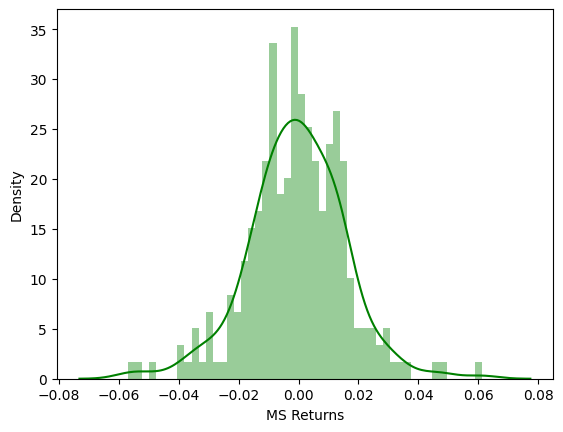

In [12]:
sns.distplot(returns['2015-01-01':'2016-01-01']['MS Returns'],color='g',bins=50)

C:\Users\HP\AppData\Local\Temp\ipykernel_10288\3722260774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns['2008-01-01':'2009-01-01']['C Returns'],color='r',bins=100)


<Axes: xlabel='C Returns', ylabel='Density'>

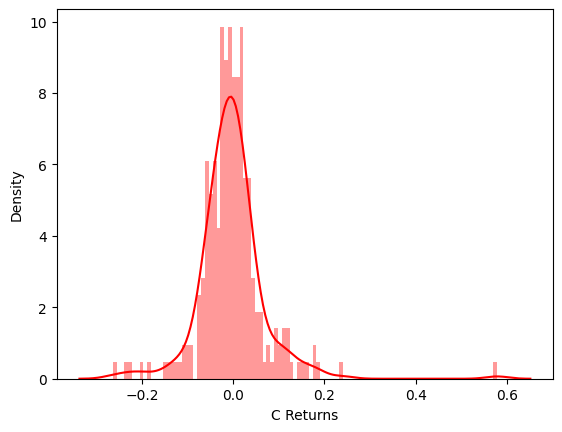

In [13]:
sns.distplot(returns['2008-01-01':'2009-01-01']['C Returns'],color='r',bins=100)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

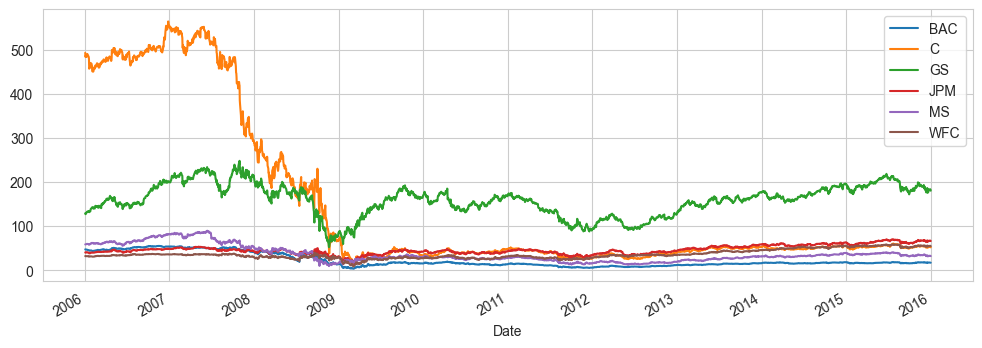

In [15]:
for ticker in tickers:
    bank_stocks[ticker]['Close'].plot(figsize=(12,4),label=ticker)
plt.legend()

<Axes: xlabel='Date'>

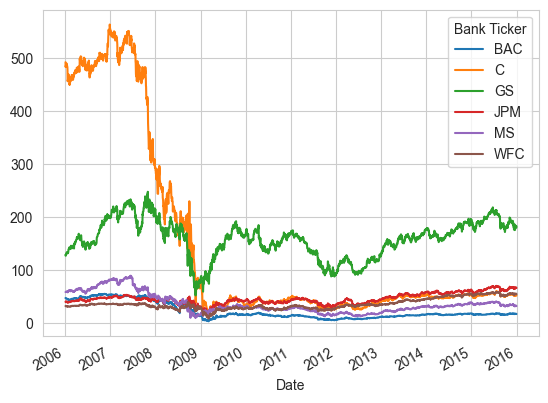

In [16]:
bank_stocks.xs('Close',axis=1,level=1).plot()

<Axes: xlabel='Date'>

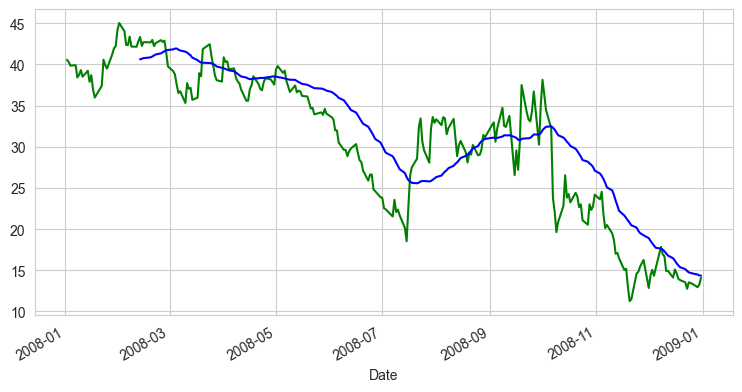

In [17]:
BAC['2008-01-01':'2009-01-01']['Close'].plot(figsize=(9,4.5),color='g')
BAC['2008-01-01':'2009-01-01']['Close'].rolling(window=30).mean().plot(figsize=(9,4.5),color='b')

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

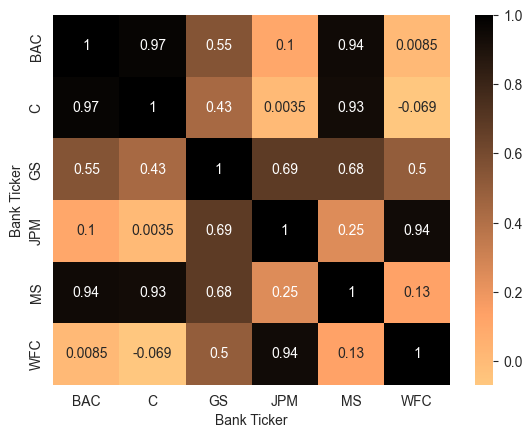

In [18]:
closecorr = bank_stocks.xs('Close',axis=1,level=1).corr()
sns.heatmap(closecorr,cmap='copper_r',annot=True)